# Laboratorio - AutoCodificadores

## Complete las tareas indicadas abajo

**TAREA: Ejecute las siguientes importaciones**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Los datos

En la tabla que van a trabajar, se encuentra el consumo promedio de 17 tipos de comida, en gramos por persona por semana, para cada país del Reino Unido (UK).

La tabla tiene algunas variaciones interesantes en diferentes tipos de comida, pero a nivel general las diferencias no son tan notables.

**TAREA:  Ejecute la siguiente instrucción para leer los datos**

Es posible que tenga que modificar la instrucción de acuerdo al lugar donde descargó el archivo.

In [5]:
df = pd.read_csv('UK_foods.csv', index_col = 'Unnamed: 0')

**TAREA: Despliegue el DataFrame**

In [6]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [7]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [8]:
df.columns

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

**TAREA:  Realice la transposición del DataFrame para que las columnas se conviertan en el índice.**

In [11]:
df_transpose = df.transpose()

In [12]:
df_transpose

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TAREA:  Cree un mapa de calor a partir del DataFrame.** 

¿Existe algún país que sobresalga por diferencia de los otros?  Puede ser bastante difícil determinar esto solo por la imagen.

- Observando el mapa de calor, es dificil determinar si hay alguno que sobresalga pues todos muestran colores similares en cada tipo de comida. Sin embargo, todos sobresalen en cierto tipo de comida como Gales en cereales y Escocia en bebidas ligeras.

¿Habrá algún par de países que parezcan muy similares entre si?
- No es posible determinar un par de paises pues realmente los 4 paises presentan colores muy similares en cada una de las categorias de comida.

<AxesSubplot:>

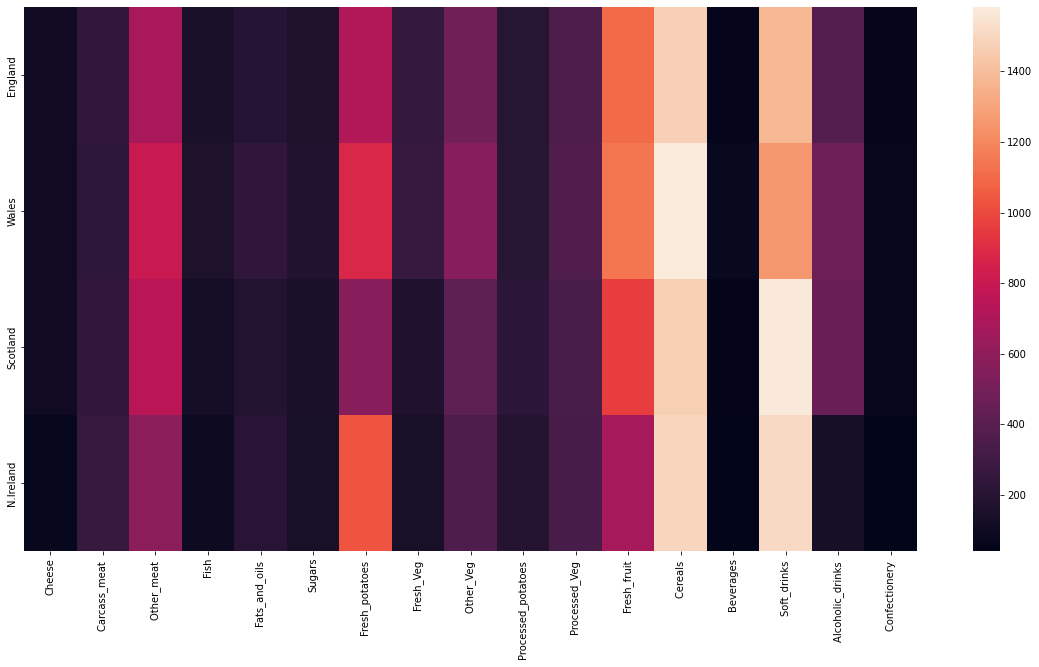

In [29]:
plt.figure(figsize = (20,10))
sns.heatmap(df_transpose)

**TAREA:  Realice las importaciones necesarias para construir un AutoCodificador.  La meta será reducir las dimensiones de 17 --> 2 y ver si hay países que resalten como diferentes.**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

**TAREA:  Cree un codificador**

In [31]:
encoder = Sequential()
encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

**TAREA: Cree un decodificador.**

In [32]:
decoder = Sequential()
decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

**TAREA: Combine el codificador y el decodificador para conformar un AutoCodificador, y complile el modelo.**

In [34]:
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

**TAREA: Cree un normalizador MinMaxScaler para normalizar (escalar) los datos.  Asegúrese de transponer los datos ya que realmente tenemos 17 columnas (features) y solo 4 filas (uno por país).**

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaled_df = scaler.fit_transform(df_transpose.values)

In [38]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [54]:
scaled_df.shape

(4, 17)

In [ ]:
# NOTA la forma debe ser 17 columnas por 4 filas.

**TAREA:  Ajuste el AutoCodificador a los datos normalizados por medio de 15 épocas.**

In [39]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 1s/step - loss: 0.4172
Epoch 2/15
1/1 [==============================] - 0s 13ms/step - loss: 0.3921
Epoch 3/15
1/1 [==============================] - 0s 14ms/step - loss: 0.3766
Epoch 4/15
1/1 [==============================] - 0s 11ms/step - loss: 0.3711
Epoch 5/15
1/1 [==============================] - 0s 15ms/step - loss: 0.3694
Epoch 6/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3681
Epoch 7/15
1/1 [==============================] - 0s 9ms/step - loss: 0.3670
Epoch 8/15
1/1 [==============================] - 0s 10ms/step - loss: 0.3662
Epoch 9/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3655
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3649
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3644
Epoch 12/15
1/1 [==============================] - 0s 5ms/step - loss: 0.3639
Epoch 13/15
1/1 [==============================] - 0s 9ms/step - los

**TAREA: Pase los datos normalizados solo por el codificador y prediga la salida ya re-dimensionada.  Nota: Lo más seguro es que obtengan resultados diferentes debido a las inicializaciones al azar.**

In [55]:
encoded_2dim = encoder.predict(scaled_df)

1/1 [==============================] - 0s 63ms/step


In [56]:
encoded_2dim

array([[0.5537308 , 1.5611634 ],
       [0.76059777, 2.1698675 ],
       [0.45349747, 1.2644261 ],
       [0.        , 0.        ]], dtype=float32)

**TAREA:  Una los datos codificados bidimensionales, con el indice original de países.  Asegúrese de verificar el orden del índice para asegurar que quede unido correctamente.  Hay muchas formas de hacer esto con Pandas.**

In [57]:
df_transpose.index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [58]:
resultados = pd.DataFrame(data=encoded_2dim,index=df_transpose.index,
                      columns=['C1','C2'])

In [59]:
resultados = resultados.reset_index()

In [60]:
resultados

,index,C1,C2
0,England,0.553731,1.561163
1,Wales,0.760598,2.169868
2,Scotland,0.453497,1.264426
3,N.Ireland,0.000000,0.000000


**TAREA:  Ahora grafique estos resultados con una gráfica de dispersión, etiquedados por su país respectivo.**

¿Se nota ya algún país que difiera de los otros?  ¿Cuál?
- Si, Irlanda del Norte difiere con los demas paises

<AxesSubplot:xlabel='C1', ylabel='C2'>

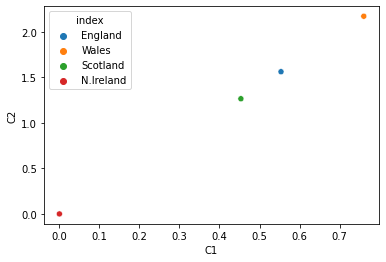

In [61]:
sns.scatterplot(x='C1',y='C2',data=resultados,hue='index')

Al regresar a ver los datos en la tabla, esto tiene sentido: los Nor-Irlandeses comen mucho más gramos de papas frescas y mucho menos de frutas frescas, queso, pescado y bebidad alcohólicas.

Es buena seña que la estructura que se visualiza refleje un hecho grande de la geografía real:  Irlanda del Norte es el único de los cuatro países que no están en la isla de Gran Bretaña. (Si tiene confusión entre Inglaterra, el Reino Unido y Gran Bretaña, vea: este [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)